# **Error Analysis on Toxicity Comments Text Classification**

# **Objective:**
In this notebook we are doing error analysis on part of training data (1k data points), by performing EDA analysis on features considered in previous notebook and find out why certain data points were wrongly predicted. 

# **Importing Packages**

In [2]:
import os
import numpy as np
import re
import nltk
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Dense,Input,Activation,Concatenate,Conv1D,Embedding,MaxPool1D,Flatten,Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import datetime
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics._classification import accuracy_score, log_loss
import seaborn as sns
from tqdm import tqdm
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn import metrics
from tensorflow.keras.utils import plot_model
from xgboost import XGBClassifier
from wordcloud import WordCloud, STOPWORDS

In [3]:
from tensorflow.keras.layers import Dense,Input,Activation,Concatenate,Conv1D,Embedding,MaxPool1D,Flatten,Dropout,Activation,LSTM,BatchNormalization,Bidirectional
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import datetime
from keras.models import load_model

# **Loading Train Data**

In [4]:
X_train, y_train = pickle.load(open("/content/drive/MyDrive/Work_files/Jigsaw_toxicity_classification/train_npdata.pkl", 'rb'))

In [5]:
X_train.head()

,id,comment_text,male,female,homosexual_gay_or_lesbian,christian,jewish,muslim,black,white,psychiatric_or_mental_illness,no_of_unique_words,word_count,toxic_words_count
369772,695670,reply solar power around 70 years great would ...,0,0,0,0,0,0,0,0,0,52,66,54
634793,1018342,party thinks win carbon taxes dreaming climate...,0,0,0,0,0,0,0,0,0,43,45,41
964708,5298193,notice not mention global warming presume need...,0,0,0,0,0,0,0,0,0,21,24,21
1061887,5414705,maybe schumer make effort civil likely never h...,0,0,0,0,0,0,0,0,0,11,11,11
1020920,5365732,im not sure people willfully ignorant experien...,1,1,0,0,0,0,1,1,0,68,80,64


# **Tokenizing**

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
to_exclude = '!"#$%&()*+-/:;<=>@[\\]^.,:;!?`{|}~\t\n'
t_model1 = Tokenizer(filters=to_exclude)

t_model1.fit_on_texts(X_train['comment_text'])
# print(t.word_index)
X_train_tokenizer_model1=t_model1.texts_to_sequences(X_train['comment_text'])

padded_X_train_seq=pad_sequences(sequences=X_train_tokenizer_model1,value=0,maxlen=500)



# **Original Preprocessed 1000 comments**

In [7]:
original_X_train_1000=X_train['comment_text'][:1000]

# **Padded Preprocessed 1000 comments**

In [8]:
data1=padded_X_train_seq[:1000]
y1=y_train[:1000]
print(data1.shape,y1.shape)

(1000, 500) (1000,)


# **Loading our Best Model**

In [9]:
model2=load_model("/content/drive/MyDrive/Work_files/Jigsaw_toxicity_classification/model4.h5")

# **Predicting on the 1000 padded sequences** 

In [10]:
data1_pred=model2.predict(data1)


## **Predicted 1000 Data points**

In [11]:
pred1=np.where(np.around(data1_pred[:,1], decimals=4)>=0.5, 1, 0)
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
pred2=np.where(np.around(data1_pred[:,1], decimals=4)>=0.4, 1, 0)
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## **Original 1000 Data points labels** 

In [13]:
np.array(y1)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Confusion matrix**

In [14]:
TP_index=[]
FP_index=[]
FN_index=[]
TN_index=[]
TP=0
FP=0
FN=0
TN=0
y1=np.array(y1)
for i in range(len(y1)):
  if pred1[i]==1 and y1[i]==1:
    TP_index.append(i)
    TP+=1
  elif pred1[i]==1 and y1[i]==0:
    FP_index.append(i)
    FP+=1
  elif pred1[i]==0 and y1[i]==1:
    FN_index.append(i)
    FN+=1
  else:
    TN_index.append(i)
    TN+=1

Text(0.5, 1.0, 'Confusion matrix')

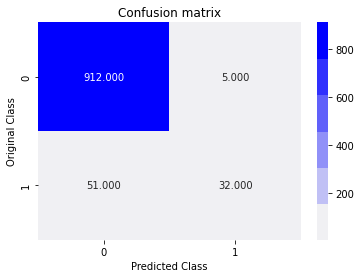

In [15]:
C=np.array([[TN,FP],[FN,TP]])
labels = [0,1]
cmap=sns.light_palette("blue")
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix")

In [16]:
temp_tdf=X_train.copy()
temp_tdf['target']=y_train
toxic_comments=temp_tdf.loc[temp_tdf["target"] == 1, :]["comment_text"]
toxic_words=[word for word in list((toxic_comments.str.split(' ', expand=True).stack().value_counts()).index) if word not in STOPWORDS][:10000]
len(toxic_words)

10000

In [17]:
def toxic_word_count(text_data):
  toxic_words_lst=[]
  for doc in text_data:
    count=0
    for w in doc.split():
      if w in toxic_words:
        count+=1
    toxic_words_lst.append(count)
  return toxic_words_lst


In [18]:
def get_text(list_index):
  temp_list=[]
  for i in list_index:
    temp_list.append(X_train['comment_text'].iloc[i])
  return pd.DataFrame(temp_list,columns=['comment_text'])
TP_text_df=get_text(TP_index)
TN_text_df=get_text(TN_index)
FN_text_df=get_text(FN_index)

In [19]:
TP_text_df.head()

,comment_text
0,yup hawaii looks stupid remember used money un...
1,mindless idiocy like undermines innovation saf...
2,crickets would come fact would not occurred fo...
3,grew marlon people thread using death politica...
4,laughable voted trump voted sexually abusing w...


In [20]:
np.array([[TN,FP],[FN,TP]])

array([[912,   5],
       [ 51,  32]])

# **Advanced features from text data**

In [21]:
uni_word_count=TP_text_df['comment_text'].apply(lambda x: len(set(w for w in x.split())))
TP_text_df['no_of_unique_words']=uni_word_count

#Adding number of words in a comment feature
no_of_words=TP_text_df['comment_text'].str.split(' ').str.len()
TP_text_df['word_count']=no_of_words

#Adding number of toxic words from the top toxic words count
TP_text_df['toxic_words_count']=toxic_word_count(TP_text_df['comment_text'])

##########################################################################################################################
uni_word_count=TN_text_df['comment_text'].apply(lambda x: len(set(w for w in x.split())))
TN_text_df['no_of_unique_words']=uni_word_count

#Adding number of words in a comment feature
no_of_words=TN_text_df['comment_text'].str.split(' ').str.len()
TN_text_df['word_count']=no_of_words

#Adding number of toxic words from the top toxic words count
TN_text_df['toxic_words_count']=toxic_word_count(TN_text_df['comment_text'])

##########################################################################################################################
uni_word_count=FN_text_df['comment_text'].apply(lambda x: len(set(w for w in x.split())))
FN_text_df['no_of_unique_words']=uni_word_count

#Adding number of words in a comment feature
no_of_words=FN_text_df['comment_text'].str.split(' ').str.len()
FN_text_df['word_count']=no_of_words

#Adding number of toxic words from the top toxic words count
FN_text_df['toxic_words_count']=toxic_word_count(FN_text_df['comment_text'])

In [22]:
TP_text_df.head(15)

,comment_text,no_of_unique_words,word_count,toxic_words_count
0,yup hawaii looks stupid remember used money un...,13,13,13
1,mindless idiocy like undermines innovation saf...,11,11,9
2,crickets would come fact would not occurred fo...,28,36,26
3,grew marlon people thread using death politica...,21,21,18
4,laughable voted trump voted sexually abusing w...,13,14,14
5,crapdum wrote jr smeared media spouts fake new...,30,32,25
6,dumbest pro life post ever still not decision ...,10,10,8
7,posts contribute meaningfully discussion topic...,11,11,10
8,kill dog football game anyone needs sacrificia...,13,13,11
9,sad think sweet little girl picture shrouded b...,15,15,13


In [23]:
TN_text_df.head(9)

,comment_text,no_of_unique_words,word_count,toxic_words_count
0,reply solar power around 70 years great would ...,52,66,54
1,party thinks win carbon taxes dreaming climate...,43,45,41
2,notice not mention global warming presume need...,21,24,21
3,maybe schumer make effort civil likely never h...,11,11,11
4,would agree known factual evidence blacks citi...,60,71,67
5,north south navigation possible done called ai...,7,7,6
6,not logic false rather comprehension not state...,27,34,27
7,exactly,1,1,1
8,pay increases compete justify even outlandish ...,89,97,82


In [24]:
FN_text_df.head(9)

,comment_text,no_of_unique_words,word_count,toxic_words_count
0,im not sure people willfully ignorant experien...,68,80,64
1,crapplebees got run town boulder years ago im ...,18,18,15
2,apparently not hear condemning white supremaci...,11,11,9
3,yeah bill damn lefties got alec baldwin get to...,22,23,19
4,stay sas michevious cocky tongue cheek attitud...,12,12,9
5,yeah right years birtherism not racialy motiva...,79,94,76
6,story big lie gas supply fine even states goug...,18,18,14
7,grateful good lord watched us yep jesus watchi...,18,18,17
8,like torpedo heart george weigel inc usccb esp...,24,24,18


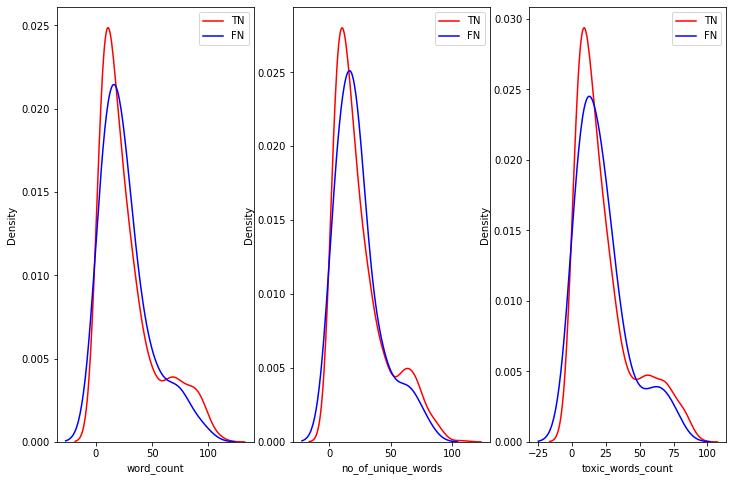

In [26]:
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
sns.distplot(TN_text_df['word_count'] , label = "1", color = 'red',hist=False)
sns.distplot(FN_text_df['word_count'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TN','FN'])

plt.subplot(1,3,2)
sns.distplot(TN_text_df['no_of_unique_words'] , label = "1", color = 'red',hist=False)
sns.distplot(FN_text_df['no_of_unique_words'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TN','FN'])

plt.subplot(1,3,3)
sns.distplot(TN_text_df['toxic_words_count'] , label = "1", color = 'red',hist=False)
sns.distplot(FN_text_df['toxic_words_count'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TN','FN'])
plt.show()

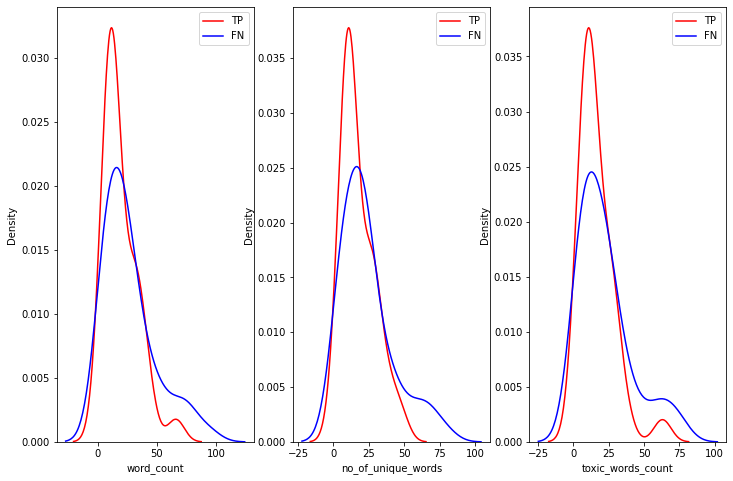

In [27]:
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
sns.distplot(TP_text_df['word_count'] , label = "1", color = 'red',hist=False)
sns.distplot(FN_text_df['word_count'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TP','FN'])

plt.subplot(1,3,2)
sns.distplot(TP_text_df['no_of_unique_words'] , label = "1", color = 'red',hist=False)
sns.distplot(FN_text_df['no_of_unique_words'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TP','FN'])

plt.subplot(1,3,3)
sns.distplot(TP_text_df['toxic_words_count'] , label = "1", color = 'red',hist=False)
sns.distplot(FN_text_df['toxic_words_count'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TP','FN'])
plt.show()

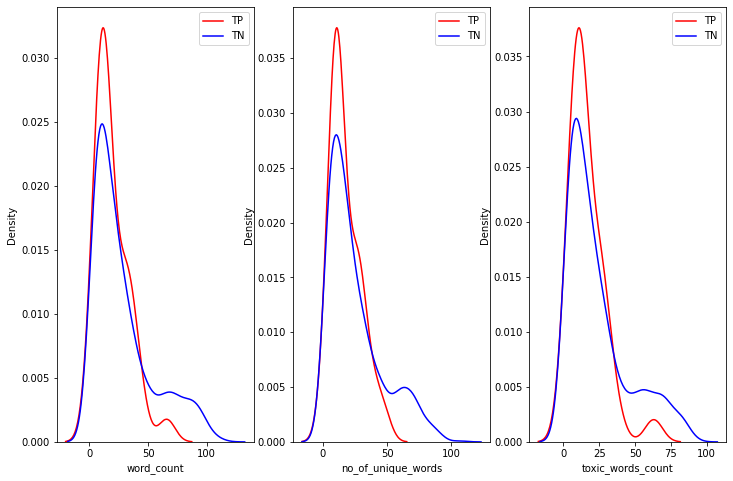

In [28]:
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
sns.distplot(TP_text_df['word_count'] , label = "1", color = 'red',hist=False)
sns.distplot(TN_text_df['word_count'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TP','TN'])

plt.subplot(1,3,2)
sns.distplot(TP_text_df['no_of_unique_words'] , label = "1", color = 'red',hist=False)
sns.distplot(TN_text_df['no_of_unique_words'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TP','TN'])

plt.subplot(1,3,3)
sns.distplot(TP_text_df['toxic_words_count'] , label = "1", color = 'red',hist=False)
sns.distplot(TN_text_df['toxic_words_count'] , label = "0" , color = 'blue' ,hist=False)
plt.legend(labels=['TP','TN'])
plt.show()

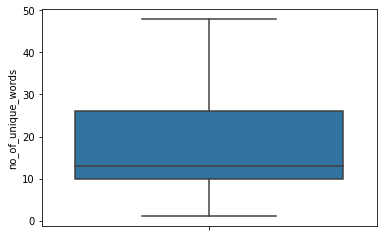

In [29]:
sns.boxplot(y=TP_text_df['no_of_unique_words'])

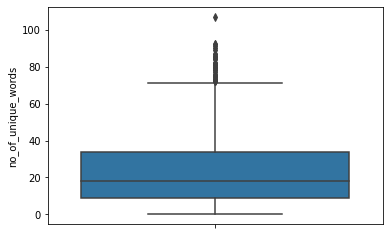

In [30]:
sns.boxplot(y=TN_text_df['no_of_unique_words'])

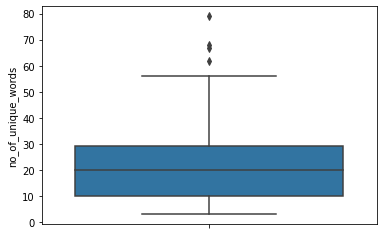

In [31]:
sns.boxplot(y=FN_text_df['no_of_unique_words'])

In [32]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/MyDrive/Work_files/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [33]:
tfidf_model_uni = TfidfVectorizer(max_features=150000)
tfidf_model_uni.fit_transform(X_train['comment_text'])
dictionary = dict(zip(tfidf_model_uni.get_feature_names(), list(tfidf_model_uni.idf_)))
tfidf_words_uni = set(tfidf_model_uni.get_feature_names())

In [34]:
len(tfidf_words_uni)

150000

In [35]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v(tw_data,tfidf_words):
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(tw_data): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  return tfidf_w2v_vectors


In [36]:
# def genearte_col(df):
X_train_1000=pd.DataFrame(original_X_train_1000)
new_column=[]
for i in range(len(X_train_1000)):
  if i in TP_index:
    new_column.append('TP')
  elif i in TN_index:
    new_column.append('TN')
  elif i in FN_index:
    new_column.append('FN')
  else:
    new_column.append('FP')
X_train_1000['new_column']=new_column

In [37]:
X_train_1000.head()

,comment_text,new_column
369772,reply solar power around 70 years great would ...,TN
634793,party thinks win carbon taxes dreaming climate...,TN
964708,notice not mention global warming presume need...,TN
1061887,maybe schumer make effort civil likely never h...,TN
1020920,im not sure people willfully ignorant experien...,FN


In [38]:
plot_df=tfidf_w2v(X_train_1000['comment_text'],tfidf_words_uni)

100%|██████████| 1000/1000 [00:00<00:00, 3784.27it/s]


In [39]:
plot_df=pd.DataFrame(plot_df)

In [40]:
plot_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.056019,0.070332,-0.082988,-0.087384,-0.007180,0.085643,-2.690446,0.195397,-0.112499,-0.098804,-0.149919,-0.004929,-0.080130,-0.116788,0.068621,0.049292,-0.107341,-0.188986,-0.157830,0.028009,0.099071,0.082591,-0.132897,0.277592,-0.070041,0.015019,-0.020776,0.121802,0.034931,-0.016987,-0.284509,0.026095,-0.013702,-0.062214,-0.048629,0.032715,0.090457,0.060070,0.146315,-0.053719,...,-0.006165,0.008297,0.144228,-0.132924,0.077951,-0.142550,0.058617,0.124681,0.116520,-0.027236,0.018813,0.034073,0.012162,-0.132358,0.081199,0.014428,0.049647,-0.002584,-0.118281,-0.052397,0.151075,-0.005647,-0.149247,-0.024279,0.076747,0.080429,0.182754,-0.063242,-0.135652,-0.007082,0.064257,-0.067968,-0.040958,-0.301852,0.017042,-0.145200,-0.124598,0.132732,0.205851,0.030703
1,-0.077072,0.195257,0.015730,-0.024489,-0.118119,0.099434,-2.973456,0.179459,0.135972,-0.213933,-0.011141,0.044535,-0.026111,-0.149144,-0.115417,0.053606,-0.082623,0.116863,0.021309,-0.027687,0.261720,-0.120829,-0.002455,0.060226,-0.024357,0.057951,-0.048158,-0.020674,0.121401,-0.018587,-0.286207,0.143661,0.178470,-0.040983,-0.033946,0.061817,-0.118756,-0.031140,-0.051119,0.078211,...,0.025353,-0.079586,0.042326,-0.127591,-0.085369,0.074340,0.016597,-0.038978,0.131335,0.106290,0.056689,-0.011614,-0.079564,-0.136304,-0.054952,-0.105592,0.084329,-0.056507,-0.011226,-0.009863,0.355899,-0.034317,0.028635,0.046647,0.034419,-0.063386,0.001538,0.099607,-0.098191,-0.136407,-0.071524,-0.012139,-0.001635,-0.051368,-0.017984,0.028194,-0.063064,-0.008392,0.172069,0.058381
2,-0.004378,-0.015556,0.085505,-0.165229,-0.022234,0.067203,-3.197140,0.372779,0.059429,-0.200026,0.093344,0.038257,-0.005390,-0.049688,0.004303,-0.095859,0.054701,-0.081270,-0.033028,-0.012638,0.212774,-0.004039,0.045198,0.156236,0.078089,-0.043471,-0.236006,-0.030068,0.104754,-0.046790,-0.302157,0.094583,0.153506,0.014913,0.052733,-0.028487,-0.086378,-0.028226,0.056541,-0.015677,...,-0.112170,-0.075602,0.060179,0.031495,-0.160886,-0.021232,0.024213,0.034799,0.064698,-0.051971,0.068195,-0.017652,-0.052318,-0.023000,0.006106,-0.110065,0.038114,-0.090112,0.002197,0.064295,0.262229,-0.111154,-0.159197,-0.116430,-0.116211,0.115377,0.062886,0.026646,-0.057252,-0.157200,-0.045927,0.004750,-0.170502,-0.071589,0.030362,-0.090783,-0.152579,0.059541,0.079492,-0.049446
3,-0.134350,0.274177,0.071216,-0.152840,-0.071779,0.086922,-3.470004,0.202651,0.039968,-0.272615,-0.161865,-0.112402,-0.027084,-0.165779,0.100387,0.186240,0.025508,0.004434,0.108164,-0.058788,0.149333,-0.034336,0.048867,0.034381,0.209277,0.026330,-0.103806,0.103595,0.093837,0.216081,-0.338169,-0.071948,-0.012577,0.031757,-0.019404,-0.177210,-0.038941,0.119955,-0.072053,-0.175506,...,-0.082900,0.055215,0.100973,0.078861,0.010543,-0.035932,0.034898,-0.012590,0.061859,-0.100603,0.006270,-0.059342,-0.106596,-0.029608,-0.102145,-0.096153,0.040206,-0.066203,-0.171135,-0.002671,0.611896,0.000570,0.171321,0.145912,-0.122224,0.050668,0.044286,-0.006852,-0.064165,0.115644,-0.068090,-0.131243,0.063485,-0.198849,0.025791,0.037898,0.147014,-0.037966,0.024500,-0.030757
4,-0.120238,0.058417,-0.001636,0.054513,-0.039330,0.046843,-3.007665,0.144434,-0.054466,-0.245822,0.075080,-0.061209,0.033049,-0.089401,0.092223,0.075922,0.054702,-0.100715,-0.011568,0.028854,0.049202,0.038119,0.051970,0.066608,-0.012002,-0.066147,0.002653,-0.049843,0.047221,0.031909,-0.256382,0.015642,0.175024,0.034064,-0.094856,0.017811,-0.112735,-0.053458,-0.088512,-0.092370,...,-0.033073,-0.052101,-0.114310,-0.101266,-0.085560,0.107210,-0.027810,0.012858,0.104341,-0.026723,0.029680,-0.015145,-0.099651,0.044732,-0.111125,-0.006900,-0.001508,0.144379,-0.052787,0.016859,0.389031,-0.087777,0.034499,0.109597,0.014428,-0.065082,0.030642,0.12462

In [41]:
from sklearn.manifold import TSNE

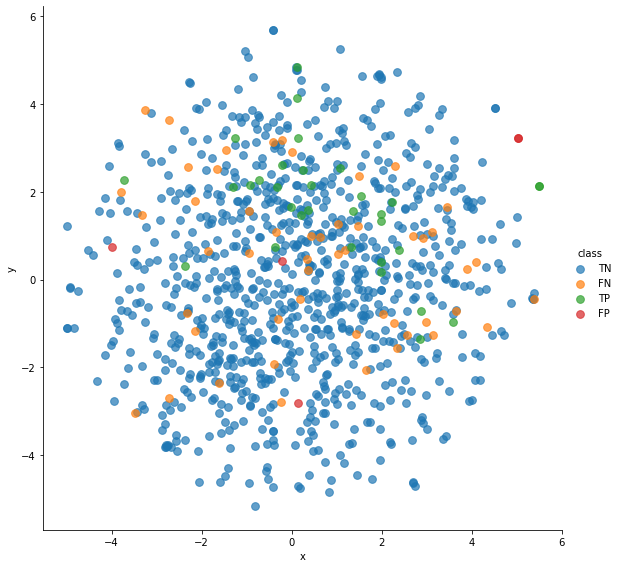

In [42]:
# Reference: https://www.kaggle.com/masterscrat/lsa-lgbm-baseline-w-system-monitoring
xtsne=TSNE(n_components=2,perplexity=100)
results=xtsne.fit_transform(plot_df)

dftsne = pd.DataFrame(results, columns=['x','y'])
dftsne['class'] = np.array(X_train_1000['new_column'])


ax = sns.lmplot('x', 'y', dftsne, hue='class', fit_reg=False, height=8, scatter_kws={'alpha':0.7,'s':60})


# **Inference:**
*   I have performed EDA analysis with boxplot, distribution plots, and TSNE representation of data.
*   From the distribution plot for all the categories (TN,FN,TP) for our three features we can say FN vs TN plot have close resemblance as the plots almost match each other
*   As in the case of FN vs TP plot distribution is far from overlaping, that means there is lot difference in features of FN & TP, which is why they are not predicted as positive(Toxic).
*   From my analysis, one can also point out that TP have lesser number of unique value and total words in its comments than FN and TN comments.
*   This proves our analysis in previous main notebook ,that non-toxic comments have high number of unique values, to be right.

*   From the TSNE plot we can say that there is minuscule difference in toxic and non-toxic comment words that visible when have high number of samples as in main notebook. 






# **Conclusion:**


*   In this notebook we have firstly considered a small part of training data around 1k points for our error analysis. 
*   I have used my best performance Bidirectional LSTM model for predicting the 1k data points.
*   We split our predicted points into True Positive, True Negative, False Positive and False Negative, and perform EDA analysis with different features.
*   Box plot , Distribution plot and TSNE representations are some of the technique used to support our analysis.

*   So we conclude with my analysis that Toxic comments have lesser number of unique values than Non-Toxic comments.





